In [ ]:
# Insira seu project token aqui

# MARATONA BEHIND THE CODE 2020

## DESAFIO 7 - TNT

<hr>

## Installing Libs

In [ ]:
#!pip install scikit-learn --upgrade

In [ ]:
#!pip install xgboost --upgrade

In [ ]:
#!pip install imblearn --upgrade

<hr>

## Download dos conjuntos de dados em formato .csv

In [1]:
import pandas as pd

# Pacote com métodos numéricos e representações matriciais
import numpy as np

# Pacotes do scikit-learn para pré-processamento de dados
# "SimpleImputer" é uma transformação para preencher valores faltantes em conjuntos de dados
from sklearn.impute import SimpleImputer

# Pacotes do scikit-learn para treinamento de modelos e construção de pipelines
# Método para separação de conjunto de dados em amostras de treino e teste
from sklearn.model_selection import train_test_split
# Método para criação de modelos baseados em árvores de decisão
from sklearn.tree import DecisionTreeClassifier

# Pacotes do scikit-learn para avaliação de modelos
# Métodos para validação cruzada do modelo criado
from sklearn.model_selection import KFold, cross_validate, StratifiedKFold

In [60]:
# Insira aqui o pandasDataFrame.
df_data_1 = pd.read_csv("./dataset/dados_train_iot.csv", encoding='utf8')

In [61]:
df_training_dataset = df_data_1
df_training_dataset.tail()

,Açaí-Guaraná,Citrus,Estação,LAT,LONG,Maçã-Verde,Movimentação,Original_269,Original_473,Pêssego,TARGET,Tangerina,Tempo,Zero,row
11890,18,42,Faria Lima,-23.5675,-46.6929,9,54552,46,77,8,NORMAL,2,2019-01-28,40,8308
11891,1,15,Faria Lima,-23.5675,-46.6929,17,51583,58,62,5,REABASTECER,16,2018-05-18,22,8058
11892,35,29,Pinheiros,-23.5664,-46.7030,12,76875,12,55,19,NORMAL,12,2018-03-04,22,8704
11893,37,33,Faria Lima,-23.5675,-46.6929,22,51379,48,22,27,REABASTECER,17,2019-12-13,0,8623
11894,27,30,Pinheiros,-23.5664,-46.7030,12,79107,53,20,8,NORMAL,43,2018-01-24,38,8664


Sobre o arquivo "training_dataset.csv", temos algumas informações gerais sobre os pontos de vendas da TNT:

**Tempo**

**Estação**

**LAT**

**LONG**

**Movimentação**

**Original_473**

**Original_269**

**Zero**

**Maçã-Verde**

**Tangerina**

**Citrus**

**Açaí-Guaraná**

**Pêssego**

**TARGET**

In [4]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11895 entries, 0 to 11894
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Açaí-Guaraná  11895 non-null  int64  
 1   Citrus        11895 non-null  int64  
 2   Estação       11895 non-null  object 
 3   LAT           11895 non-null  float64
 4   LONG          11895 non-null  float64
 5   Maçã-Verde    11895 non-null  int64  
 6   Movimentação  11895 non-null  int64  
 7   Original_269  11895 non-null  int64  
 8   Original_473  11895 non-null  int64  
 9   Pêssego       11895 non-null  int64  
 10  TARGET        11895 non-null  object 
 11  Tangerina     11895 non-null  int64  
 12  Tempo         11895 non-null  object 
 13  Zero          11895 non-null  int64  
 14  row           11895 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.4+ MB


In [5]:
df_training_dataset.nunique()

Açaí-Guaraná       42
Citrus             43
Estação            25
LAT                25
LONG               25
Maçã-Verde         43
Movimentação    10831
Original_269       65
Original_473       81
Pêssego            42
TARGET              2
Tangerina          42
Tempo             716
Zero               63
row             11895
dtype: int64

<hr>

## Detalhamento do desafio: classificação binária

Este é um desafio cujo objetivo de negócio é a segmentação dos usuários de aplicativo de um banco. Para tal, podemos utilizar duas abordagens: aprendizado de máquina supervisionado (classificação) ou não-supervisionado (clustering). Neste desafio será aplicada a classificação, pois é disponível um dataset já com "labels", ou em outras palavras, já com exemplos de dados juntamente com a variável alvo.

Na biblioteca scikit-learn temos diversos algoritmos para classificação. O participante é livre para utilizar o framework que desejar para completar esse desafio.

Neste notebook será mostrado um exeplo de uso do algoritmo "Decision Tree" para classificar parte dos estudantes em seis diferentes perfís.

# Atenção!

A coluna-alvo neste desafio é a coluna ``TARGET``

<hr>

In [62]:
df_training_dataset.isna().sum()

Açaí-Guaraná    0
Citrus          0
Estação         0
LAT             0
LONG            0
Maçã-Verde      0
Movimentação    0
Original_269    0
Original_473    0
Pêssego         0
TARGET          0
Tangerina       0
Tempo           0
Zero            0
row             0
dtype: int64

## Pre-processando o dataset antes do treinamento

### Criando outras colunas relevantes

In [65]:
#df_data_fk1 = df_training_dataset.set_index('row').sort_values(by = ['Estação', 'Tempo'])
df_data_fk1 = df_training_dataset.sort_values(by = ['Estação', 'Tempo'])
df_data_fk1['Data'] = pd.to_datetime(df_data_fk1['Tempo'], format='%Y-%m-%d')
df_data_fk1.head(5)

,Açaí-Guaraná,Citrus,Estação,LAT,LONG,Maçã-Verde,Movimentação,Original_269,Original_473,Pêssego,TARGET,Tangerina,Tempo,Zero,row,Data
11279,43,43,Ana Rosa,-23.5813,-46.6383,43,64063,65,86,43,NORMAL,43,2018-01-01,65,11521,2018-01-01
527,37,43,Ana Rosa,-23.5813,-46.6383,41,63974,60,75,37,NORMAL,37,2018-01-02,55,11522,2018-01-02
2367,31,40,Ana Rosa,-23.5813,-46.6383,38,66786,54,68,31,NORMAL,31,2018-01-03,45,11523,2018-01-03
7534,25,35,Ana Rosa,-23.5813,-46.6383,37,66931,45,57,29,NORMAL,25,2018-01-04,37,11524,2018-01-04
7003,20,32,Ana Rosa,-23.5813,-46.6383,36,66581,42,45,24,NORMAL,23,2018-01-05,30,11525,2018-01-05


In [66]:
df_data_fk1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11895 entries, 11279 to 10262
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Açaí-Guaraná  11895 non-null  int64         
 1   Citrus        11895 non-null  int64         
 2   Estação       11895 non-null  object        
 3   LAT           11895 non-null  float64       
 4   LONG          11895 non-null  float64       
 5   Maçã-Verde    11895 non-null  int64         
 6   Movimentação  11895 non-null  int64         
 7   Original_269  11895 non-null  int64         
 8   Original_473  11895 non-null  int64         
 9   Pêssego       11895 non-null  int64         
 10  TARGET        11895 non-null  object        
 11  Tangerina     11895 non-null  int64         
 12  Tempo         11895 non-null  object        
 13  Zero          11895 non-null  int64         
 14  row           11895 non-null  int64         
 15  Data          11895 non-null  da

### Calcula a diferenca entre linhas consecutivas (está ordenado por estação e data)

In [67]:
df_data_fk2 = df_data_fk1[['Açaí-Guaraná', 'Citrus', 'Maçã-Verde', 'Original_269', 
                           'Original_473', 'Pêssego', 'Tangerina', 'Data', 'Zero']].diff()
df_data_fk2['Dif_Dias'] = df_data_fk2['Data'].dt.days
df_data_fk2 = df_data_fk2.dropna()
df_data_fk2 = df_data_fk2.drop(df_data_fk2[df_data_fk2['Dif_Dias']<0].index)
df_data_fk2.head()

,Açaí-Guaraná,Citrus,Maçã-Verde,Original_269,Original_473,Pêssego,Tangerina,Data,Zero,Dif_Dias
527,-6.0,0.0,-2.0,-5.0,-11.0,-6.0,-6.0,1 days,-10.0,1.0
2367,-6.0,-3.0,-3.0,-6.0,-7.0,-6.0,-6.0,1 days,-10.0,1.0
7534,-6.0,-5.0,-1.0,-9.0,-11.0,-2.0,-6.0,1 days,-8.0,1.0
7003,-5.0,-3.0,-1.0,-3.0,-12.0,-5.0,-2.0,1 days,-7.0,1.0
528,-3.0,0.0,-2.0,-6.0,-12.0,-6.0,-5.0,1 days,-7.0,1.0


### Normaliza a diferença pela quantidade de dias

In [68]:
df_data_fk3 = df_data_fk2.div(df_data_fk2['Dif_Dias'], axis=0)
df_data_fk3.head()

,Açaí-Guaraná,Citrus,Maçã-Verde,Original_269,Original_473,Pêssego,Tangerina,Data,Zero,Dif_Dias
527,-6.0,0.0,-2.0,-5.0,-11.0,-6.0,-6.0,1 days,-10.0,1.0
2367,-6.0,-3.0,-3.0,-6.0,-7.0,-6.0,-6.0,1 days,-10.0,1.0
7534,-6.0,-5.0,-1.0,-9.0,-11.0,-2.0,-6.0,1 days,-8.0,1.0
7003,-5.0,-3.0,-1.0,-3.0,-12.0,-5.0,-2.0,1 days,-7.0,1.0
528,-3.0,0.0,-2.0,-6.0,-12.0,-6.0,-5.0,1 days,-7.0,1.0


### Combinas as colunas de diferença com as colunas de valores absolutos

In [81]:
df_data_fk4 = pd.merge(left = df_data_fk1, right = df_data_fk3[['Açaí-Guaraná', 'Citrus', 'Maçã-Verde', 'Original_269', 
                           'Original_473', 'Pêssego', 'Tangerina', 'Zero']], suffixes = ('','_dif'), how ='left', left_index=True, right_index=True)#, on = 'row')
#df_data_fk4.to_csv(r'./dataset/teste.csv', encoding='utf8')
#df_data_fk4.head()
df_data_fk4.loc[11279]

Açaí-Guaraná                         43
Citrus                               43
Estação                        Ana Rosa
LAT                            -23.5813
LONG                           -46.6383
Maçã-Verde                           43
Movimentação                      64063
Original_269                         65
Original_473                         86
Pêssego                              43
TARGET                           NORMAL
Tangerina                            43
Tempo                        2018-01-01
Zero                                 65
row                               11521
Data                2018-01-01 00:00:00
Açaí-Guaraná_dif                    NaN
Citrus_dif                          NaN
Maçã-Verde_dif                      NaN
Original_269_dif                    NaN
Original_473_dif                    NaN
Pêssego_dif                         NaN
Tangerina_dif                       NaN
Zero_dif                            NaN
Name: 11279, dtype: object

### Cria colunas de minimos e médias harmonicas

In [82]:
cols = ['Açaí-Guaraná', 'Citrus', 'Maçã-Verde', 'Original_269', 
                           'Original_473', 'Pêssego', 'Tangerina', 'Zero']
idx_cols = [df_data_fk4.columns.get_loc(c) for c in cols if c in df_data_fk4]

In [83]:
from scipy.stats.mstats import gmean, hmean

df_data_fk4['MIN'] = df_data_fk4[cols].min(axis=1)
#df_data_fk4['MEDIA'] = df_data_fk4[cols].mean(axis=1)
with np.errstate(divide='ignore'):
    #df_data_fk4['MEDIAG'] = gmean(df_data_fk4.iloc[:,idx_cols], axis=1)
    df_data_fk4['MEDIAH'] = hmean(df_data_fk4.iloc[:,idx_cols], axis=1)
df_data_fk4.head()

,Açaí-Guaraná,Citrus,Estação,LAT,LONG,Maçã-Verde,Movimentação,Original_269,Original_473,Pêssego,...,Açaí-Guaraná_dif,Citrus_dif,Maçã-Verde_dif,Original_269_dif,Original_473_dif,Pêssego_dif,Tangerina_dif,Zero_dif,MIN,MEDIAH
11279,43,43,Ana Rosa,-23.5813,-46.6383,43,64063,65,86,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,50.417136
527,37,43,Ana Rosa,-23.5813,-46.6383,41,63974,60,75,37,...,-6.0,0.0,-2.0,-5.0,-11.0,-6.0,-6.0,-10.0,37,45.221000
2367,31,40,Ana Rosa,-23.5813,-46.6383,38,66786,54,68,31,...,-6.0,-3.0,-3.0,-6.0,-7.0,-6.0,-6.0,-10.0,31,39.304969
7534,25,35,Ana Rosa,-23.5813,-46.6383,37,66931,45,57,29,...,-6.0,-5.0,-1.0,-9.0,-11.0,-2.0,-6.0,-8.0,25,33.773184
7003,20,32,Ana Rosa,-23.5813,-46.6383,36,66581,42,45,24,...,-5.0,-3.0,-1.0,-3.0,-12.0,-5.0,-2.0,-7.0,20,29.246417


### Processando valores NaN com o SimpleImputer do sklearn

Para os valores NaN, usaremos a substituição pela constante 0 como **exemplo**.

Você pode escolher a estratégia que achar melhor para tratar os valores nulos :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [15]:
from sklearn.impute import SimpleImputer
import numpy as np


impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value=0,
    verbose=0,
    copy=True
)

In [16]:
df_training_dataset = df_data_fk4

# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação SimpleImputer: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

# Aplicando a transformação ``SimpleImputer`` no conjunto de dados base
impute_zeros.fit(X=df_training_dataset)

# Reconstruindo um Pandas DataFrame com os resultados
df_training_dataset_imputed = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_training_dataset
    ),
    columns=df_training_dataset.columns
)

# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação SimpleImputer: \n\n{}\n".format(df_training_dataset_imputed.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação SimpleImputer: 

Açaí-Guaraná         0
Citrus               0
Estação              0
LAT                  0
LONG                 0
Maçã-Verde           0
Movimentação         0
Original_269         0
Original_473         0
Pêssego              0
TARGET               0
Tangerina            0
Tempo                0
Zero                 0
Data                 0
Açaí-Guaraná_dif    25
Citrus_dif          25
Maçã-Verde_dif      25
Original_269_dif    25
Original_473_dif    25
Pêssego_dif         25
Tangerina_dif       25
Zero_dif            25
MIN                  0
MEDIAH               0
dtype: int64

Valores nulos no df_training_dataset após a transformação SimpleImputer: 

Açaí-Guaraná        0
Citrus              0
Estação             0
LAT                 0
LONG                0
Maçã-Verde          0
Movimentação        0
Original_269        0
Original_473        0
Pêssego             0
TARGET              0
Tangerina        

### Criando colunas de projeção caso queda se mantenha

In [27]:
df_data_fk4 = df_training_dataset_imputed

for c in ['Açaí-Guaraná', 'Citrus', 'Maçã-Verde', 'Original_269', 'Original_473','Pêssego', 'Tangerina', 'Zero']:
    df_data_fk4[c + '_prev'] = df_data_fk4[c] + df_data_fk4[c+'_dif']

df_training_dataset_imputed = df_data_fk4
df_data_fk4.head()

,Açaí-Guaraná,Citrus,Estação,LAT,LONG,Maçã-Verde,Movimentação,Original_269,Original_473,Pêssego,...,MIN,MEDIAH,Açaí-Guaraná_prev,Citrus_prev,Maçã-Verde_prev,Original_269_prev,Original_473_prev,Pêssego_prev,Tangerina_prev,Zero_prev
0,43,43,Ana Rosa,-23.5813,-46.6383,43,64063,65,86,43,...,43,50.417136,43.0,43.0,43.0,65.0,86.0,43.0,43.0,65.0
1,37,43,Ana Rosa,-23.5813,-46.6383,41,63974,60,75,37,...,37,45.221000,31.0,43.0,39.0,55.0,64.0,31.0,31.0,45.0
2,31,40,Ana Rosa,-23.5813,-46.6383,38,66786,54,68,31,...,31,39.304969,25.0,37.0,35.0,48.0,61.0,25.0,25.0,35.0
3,25,35,Ana Rosa,-23.5813,-46.6383,37,66931,45,57,29,...,25,33.773184,19.0,30.0,36.0,36.0,46.0,27.0,19.0,29.0
4,20,32,Ana Rosa,-23.5813,-46.6383,36,66581,42,45,24,...,20,29.246417,15.0,29.0,35.0,39.0,33.0,19.0,21.0,23.0


### Eliminando colunas indesejadas

Vamos **demonstrar** abaixo como usar o método **DataFrame.drop()**.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [29]:
df_training_dataset_imputed.tail()

,Açaí-Guaraná,Citrus,Estação,LAT,LONG,Maçã-Verde,Movimentação,Original_269,Original_473,Pêssego,...,MIN,MEDIAH,Açaí-Guaraná_prev,Citrus_prev,Maçã-Verde_prev,Original_269_prev,Original_473_prev,Pêssego_prev,Tangerina_prev,Zero_prev
11890,17,20,Vila Mariana,-23.5895,-46.6346,18,23036,48,63,27,...,7,19.198745,11.000000,20.000000,17.000000,46.000000,51.000000,24.0,1.000000,21.000000
11891,11,15,Vila Mariana,-23.5895,-46.6346,17,21894,39,56,25,...,1,5.902086,5.000000,10.000000,16.000000,30.000000,49.000000,23.0,-5.000000,8.000000
11892,7,12,Vila Mariana,-23.5895,-46.6346,12,24461,31,44,23,...,7,14.750504,3.000000,9.000000,7.000000,23.000000,32.000000,21.0,85.000000,0.000000
11893,41,43,Vila Mariana,-23.5895,-46.6346,43,22540,8,13,8,...,8,17.776743,52.333333,53.333333,53.333333,0.333333,2.666667,3.0,25.666667,67.666667
11894,32,35,Vila Mariana,-23.5895,-46.6346,42,21844,63,86,43,...,21,38.401992,27.500000,31.000000,41.500000,90.500000,122.500000,60.5,16.500000,30.500000


In [30]:
#df_training_dataset_rmcolumns = df_training_dataset_imputed.drop(columns=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação'], inplace=False)
df_training_dataset_rmcolumns = df_training_dataset_imputed.drop(columns=['Tempo', 'LAT', 'LONG', 'Data', 'Movimentação'], inplace=False)

In [31]:
df_training_dataset_rmcolumns.tail()

,Açaí-Guaraná,Citrus,Estação,Maçã-Verde,Original_269,Original_473,Pêssego,TARGET,Tangerina,Zero,...,MIN,MEDIAH,Açaí-Guaraná_prev,Citrus_prev,Maçã-Verde_prev,Original_269_prev,Original_473_prev,Pêssego_prev,Tangerina_prev,Zero_prev
11890,17,20,Vila Mariana,18,48,63,27,NORMAL,7,28,...,7,19.198745,11.000000,20.000000,17.000000,46.000000,51.000000,24.0,1.000000,21.000000
11891,11,15,Vila Mariana,17,39,56,25,NORMAL,1,18,...,1,5.902086,5.000000,10.000000,16.000000,30.000000,49.000000,23.0,-5.000000,8.000000
11892,7,12,Vila Mariana,12,31,44,23,REABASTECER,43,9,...,7,14.750504,3.000000,9.000000,7.000000,23.000000,32.000000,21.0,85.000000,0.000000
11893,41,43,Vila Mariana,43,8,13,8,REABASTECER,30,53,...,8,17.776743,52.333333,53.333333,53.333333,0.333333,2.666667,3.0,25.666667,67.666667
11894,32,35,Vila Mariana,42,63,86,43,NORMAL,21,38,...,21,38.401992,27.500000,31.000000,41.500000,90.500000,122.500000,60.5,16.500000,30.500000


# Atenção!

As colunas removidas acima são apenas para fim de exemplo, você pode usar as colunas que quiser e inclusive criar novas colunas com dados que achar importantes!


### Tratamento de de variáveis categóricas

Como mencionado antes, os computadores não são bons com variáveis "categóricas" (ou strings).

Dado uma coluna com variável categórica, o que podemos realizar é a codificação dessa coluna em múltiplas colunas contendo variáveis binárias. Esse processo é chamado de "one-hot-encoding" ou "dummy encoding". Se você não é familiarizado com esses termos, você pode pesquisar mais sobre isso na internet :)

In [32]:
# Tratando variáveis categóricas com o método Pandas ``get_dummies()''
# df_training = pd.get_dummies(df_training_dataset_rmcolumns, columns=['Variável a ser aplicado método getDumies()'])
df_training_dataset_rmcolumns['Estação_orig'] = df_training_dataset_rmcolumns['Estação']
df_training = pd.get_dummies(df_training_dataset_rmcolumns, columns=['Estação'])
#df_training = df_training_dataset_rmcolumns
df_training.tail()

,Açaí-Guaraná,Citrus,Maçã-Verde,Original_269,Original_473,Pêssego,TARGET,Tangerina,Zero,Açaí-Guaraná_dif,...,Estação_Paraíso,Estação_Pinheiros,Estação_República,Estação_São Joaquim,Estação_São Judas,Estação_Sé,Estação_Tamanduateí,Estação_Tatuapé,Estação_Trianon-Masp,Estação_Vila Mariana
11890,17,20,18,48,63,27,NORMAL,7,28,-6.000000,...,0,0,0,0,0,0,0,0,0,1
11891,11,15,17,39,56,25,NORMAL,1,18,-6.000000,...,0,0,0,0,0,0,0,0,0,1
11892,7,12,12,31,44,23,REABASTECER,43,9,-4.000000,...,0,0,0,0,0,0,0,0,0,1
11893,41,43,43,8,13,8,REABASTECER,30,53,11.333333,...,0,0,0,0,0,0,0,0,0,1
11894,32,35,42,63,86,43,NORMAL,21,38,-4.500000,...,0,0,0,0,0,0,0,0,0,1


# Atenção!

A coluna **TARGET** deve ser mantida como uma string. Você não precisa processar/codificar a variável-alvo.

<hr>

## Treinando um classificador com base em uma árvore de decisão

### Selecionando FEATURES e definindo a variável TARGET

In [33]:
df_training.columns

Index(['Açaí-Guaraná', 'Citrus', 'Maçã-Verde', 'Original_269', 'Original_473',
       'Pêssego', 'TARGET', 'Tangerina', 'Zero', 'Açaí-Guaraná_dif',
       'Citrus_dif', 'Maçã-Verde_dif', 'Original_269_dif', 'Original_473_dif',
       'Pêssego_dif', 'Tangerina_dif', 'Zero_dif', 'MIN', 'MEDIAH',
       'Açaí-Guaraná_prev', 'Citrus_prev', 'Maçã-Verde_prev',
       'Original_269_prev', 'Original_473_prev', 'Pêssego_prev',
       'Tangerina_prev', 'Zero_prev', 'Estação_orig', 'Estação_Ana Rosa',
       'Estação_Barra Funda', 'Estação_Brigadeiro', 'Estação_Brooklin',
       'Estação_Brás', 'Estação_Butantã', 'Estação_Campo Belo',
       'Estação_Consolação', 'Estação_Eucaliptos', 'Estação_Faria Lima',
       'Estação_Fradique Coutinho', 'Estação_Higienópolis-Mackenzie',
       'Estação_Hospital São Paulo', 'Estação_Luz', 'Estação_Moema',
       'Estação_Paraíso', 'Estação_Pinheiros', 'Estação_República',
       'Estação_São Joaquim', 'Estação_São Judas', 'Estação_Sé',
       'Estação_Tamandu

In [42]:
features = df_training[
    [
        'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina','Citrus', 'Açaí-Guaraná', 'Pêssego',
        #'Original_473_dif', 'Original_269_dif', 'Zero_dif', 'Maçã-Verde_dif', 'Tangerina_dif','Citrus_dif', 'Açaí-Guaraná_dif','Pêssego_dif',
        'Açaí-Guaraná_prev', 'Citrus_prev', 'Maçã-Verde_prev', 'Original_269_prev', 'Original_473_prev', 'Pêssego_prev', 'Tangerina_prev', 'Zero_prev',
        'MIN', #'MEDIAH',
        'Estação_Ana Rosa', 'Estação_Barra Funda',
        'Estação_Brigadeiro', 'Estação_Brooklin', 'Estação_Brás',
        'Estação_Butantã', 'Estação_Campo Belo', 'Estação_Consolação',
        'Estação_Eucaliptos', 'Estação_Faria Lima', 'Estação_Fradique Coutinho',
        'Estação_Higienópolis-Mackenzie', 'Estação_Hospital São Paulo',
        'Estação_Luz', 'Estação_Moema', 'Estação_Paraíso', 'Estação_Pinheiros',
        'Estação_República', 'Estação_São Joaquim', 'Estação_São Judas',
        'Estação_Sé', 'Estação_Tamanduateí', 'Estação_Tatuapé',
        'Estação_Trianon-Masp', 'Estação_Vila Mariana'
    ]
]

target = df_training['TARGET']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.

### Dividindo nosso conjunto de dados em conjuntos de treinamento e teste

In [52]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.15, random_state=133)

### Treinando uma árvore de decisão

In [53]:
# Método para criar um árvore de decisão
from sklearn.tree import DecisionTreeClassifier


dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth=4).fit(X_train, y_train)

### Fazendo previsões na amostra de teste

In [54]:
y_pred = dtc.predict(X_test)
print(y_pred)

['REABASTECER' 'REABASTECER' 'REABASTECER' ... 'REABASTECER' 'REABASTECER'
 'REABASTECER']


### Analisando a qualidade do modelo através da matriz de confusão

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

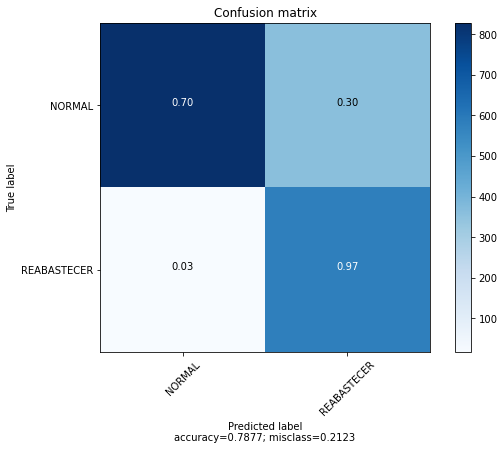

0.7530944625407165

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])
f1_score(y_test, y_pred, average="binary", pos_label="REABASTECER")

<hr>

## Scoring dos dados necessários para entregar a solução

Como entrega da sua solução, esperamos os resultados classificados no seguinte dataset chamado "to_be_scored.csv":

### Download da "folha de respostas"

In [84]:
#!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'./dataset/to_be_scored.csv')
df_to_be_scored.tail()

,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego
979,2019-8-19,Hospital São Paulo,-23.5984,-46.6455,26787,34,65,28,17,33,27,6,2
980,2019-8-20,Hospital São Paulo,-23.5984,-46.6455,26629,21,60,18,15,27,22,43,43
981,2019-8-21,Hospital São Paulo,-23.5984,-46.6455,27517,9,56,13,14,21,17,37,37
982,2019-8-22,Hospital São Paulo,-23.5984,-46.6455,26860,86,49,7,14,17,12,33,33
983,2019-8-23,Hospital São Paulo,-23.5984,-46.6455,24571,74,41,65,8,14,7,27,27


In [ ]:
#df_to_be_scored = pd.read_csv('to_be_scored.csv')
#df_to_be_scored.tail()

# Atenção!

O dataframe ``to_be_scored`` é a sua "folha de respostas". Note que a coluna "TARGET" não existe nessa amostra, que não pode ser então utilizada para treino de modelos de aprendizado supervisionado.

In [85]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tempo         984 non-null    object 
 1   Estação       984 non-null    object 
 2   LAT           984 non-null    float64
 3   LONG          984 non-null    float64
 4   Movimentação  984 non-null    int64  
 5   Original_473  984 non-null    int64  
 6   Original_269  984 non-null    int64  
 7   Zero          984 non-null    int64  
 8   Maçã-Verde    984 non-null    int64  
 9   Tangerina     984 non-null    int64  
 10  Citrus        984 non-null    int64  
 11  Açaí-Guaraná  984 non-null    int64  
 12  Pêssego       984 non-null    int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 100.1+ KB


<hr>

# Atenção!

# Para poder aplicar seu modelo e classificar a folha de respostas, você precisa primeiro aplicar as mesmas transformações com colunas que você aplicou no dataset de treino.

# Não remova ou adicione linhas na folha de respostas. 

# Não altere a ordem das linhas na folha de respostas.

# Ao final, as 1000 entradas devem estar classificadas, com os valores previstos em uma coluna chamada "target"

<hr>

Na célula abaixo, repetimos rapidamente os mesmos passos de pré-processamento usados no exemplo dado com árvore de decisão

In [86]:
# 1 - Removendo linhas com valores NaN
df_to_be_scored_1 = df_to_be_scored.dropna(axis='index', how='any', subset=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação', 'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina', 'Citrus', 'Açaí-Guaraná', 'Pêssego'])

# 1.1 - Criando as colunas a mais
df_data_fk2 = df_to_be_scored_1[['Açaí-Guaraná', 'Citrus', 'Maçã-Verde', 'Original_269', 
                           'Original_473', 'Pêssego', 'Tangerina', 'Data', 'Zero']].diff()
df_data_fk2['Dif_Dias'] = df_data_fk2['Data'].dt.days
df_data_fk2 = df_data_fk2.dropna()
df_data_fk2 = df_data_fk2.drop(df_data_fk2[df_data_fk2['Dif_Dias']<0].index)

df_data_fk3 = df_data_fk2.div(df_data_fk2['Dif_Dias'], axis=0)

df_data_fk4 = pd.merge(left = df_data_fk1, right = df_data_fk3[['Açaí-Guaraná', 'Citrus', 'Maçã-Verde', 'Original_269', 
                           'Original_473', 'Pêssego', 'Tangerina', 'Zero']], suffixes = ('','_dif'), how ='left', left_index=True, right_index=True)

cols = ['Açaí-Guaraná', 'Citrus', 'Maçã-Verde', 'Original_269', 
                           'Original_473', 'Pêssego', 'Tangerina', 'Zero']
#idx_cols = [df_data_fk4.columns.get_loc(c) for c in cols if c in df_data_fk4]
df_data_fk4['MIN'] = df_data_fk4[cols].min(axis=1)

for c in ['Açaí-Guaraná', 'Citrus', 'Maçã-Verde', 'Original_269', 'Original_473','Pêssego', 'Tangerina', 'Zero']:
    df_data_fk4[c + '_prev'] = df_data_fk4[c] + df_data_fk4[c+'_dif']


df_to_be_scored_1 = df_data_fk4

KeyError: "['Data'] not in index"

In [ ]:


# 2 - Inputando zeros nos valores faltantes
impute_zeros.fit(X=df_to_be_scored_1)
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_to_be_scored_1
    ),
    columns=df_to_be_scored_1.columns
)

# 3 - Remoção de colunas
df_to_be_scored_3 = df_to_be_scored_2.drop(columns=['Tempo', 'LAT', 'LONG', 'Data', 'Movimentação'], inplace=False)

# 4 - Encoding com "dummy variables" (se necessário)
# df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_3, columns=['Váriavel com dummy'])
df_to_be_scored_3['Estação_orig'] = df_to_be_scored_3['Estação']
df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_3, columns=['Estação'])
#df_to_be_scored_4 = df_to_be_scored_3

df_to_be_scored_4.tail()

<hr>

Pode ser verificado abaixo que as colunas da folha de resposta agora são idênticas às que foram usadas para treinar o modelo:

In [ ]:
df_training[
    [
        'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'
    ]
].columns

In [ ]:
df_to_be_scored_4.columns

# Atenção

Para todas colunas que não existirem no "df_to_be_scored", você pode usar a técnica abaixo para adicioná-las:

In [ ]:
y_pred = dtc.predict(df_to_be_scored_4)
df_to_be_scored_4['TARGET'] = y_pred
df_to_be_scored_4.tail()

### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [ ]:
project.save_data(file_name="results.csv", data=df_to_be_scored_4.to_csv(index=False))

# Atenção

# A execução da célula acima irá criar um novo "data asset" no seu projeto no Watson Studio. Você precisará realizar o download deste arquivo juntamente com este notebook e criar um arquivo zip com os arquivos **results.csv** e **notebook.ipynb** para submissão. (os arquivos devem estar nomeados desta forma)

<hr>

## Parabéns!

Se você já está satisfeito com a sua solução, vá até a página abaixo e envie os arquivos necessários para submissão.

# https://tnt.maratona.dev
